<a href="https://colab.research.google.com/github/Harika822/projects/blob/master/Flight_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This example explore with Flight Data appling with different Categorical techiques

In [ ]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [ ]:
flights =pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')
flights.head(5)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
year         162049 non-null int64
month        162049 non-null int64
day          162049 non-null int64
dep_time     161192 non-null float64
dep_delay    161192 non-null float64
arr_time     161061 non-null float64
arr_delay    160748 non-null float64
carrier      162049 non-null object
tailnum      161801 non-null object
flight       162049 non-null int64
origin       162049 non-null object
dest         162049 non-null object
air_time     160748 non-null float64
distance     162049 non-null int64
hour         161192 non-null float64
minute       161192 non-null float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB


To work with Categorical Variables, Create a new dataframe and filter out. using Copy Library we can copy the Dataframe .copy() function. Any changes made in new dataframe not reflect in the original one

In [ ]:
#Here we create a new dataframe and bring all the columns with Object data type
Category_flights =flights.select_dtypes(include=['object']).copy()
Category_flights.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


In [ ]:
#Most common data pre-processing steps to check for null values in the dataset
print(Category_flights.isnull().values.sum())

248


In [ ]:
#Check he column wise distributio of null values
print(Category_flights.isnull().sum())

carrier      0
tailnum    248
origin       0
dest         0
dtype: int64


In [ ]:
Category_flights=Category_flights.fillna(Category_flights['tailnum'].value_counts().index[0])

In [ ]:
print(Category_flights.isnull().values.sum())

0


Working with EDA (Exploratory Data Analysis, Categorical Featurs is the frequency distribution of categories with in the feature. Using .value_counts() method its easy to view the values for each feature

In [ ]:
print(Category_flights['carrier'].value_counts())

AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64


In [ ]:
#To Know the count of distinct categories within the feature , use .count() method
print(Category_flights['carrier'].value_counts().count())

11


Show Frequency Distribution of a Categorical Feature showing on Carrier Column

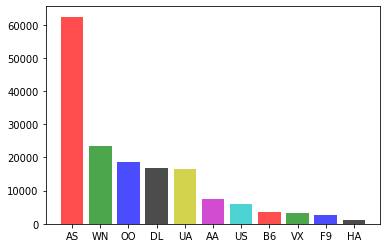

In [ ]:
carrier_count = Category_flights['carrier'].value_counts()
colors='rgbkymc'
plt.bar(carrier_count.index,carrier_count.values,alpha=0.7,color=colors)
plt.show()

Encoding Categorical Variables

Its Good Approach to typecast categorical features to a Category dtype because the operations on columns much fsater than the object dtype. We can do the typecasting by using .astype() method on our columns

In [ ]:
Category_flights['carrier'].unique()

array(['AS', 'US', 'UA', 'DL', 'AA', 'F9', 'VX', 'OO', 'WN', 'B6', 'HA'],
      dtype=object)

In [ ]:
Category_flights['origin'].unique()

array(['PDX', 'SEA'], dtype=object)

Brining the columns to Category dtype will help to execute faster

In [ ]:
#Create a New Dataframe as Category_flights_new and assign the columns to Category datatype
#We Observed the Carrier and Origin columns are Categorical values
Category_flights_new = Category_flights.copy()
Category_flights_new['carrier'] =Category_flights_new['carrier'].astype('category')
Category_flights_new['origin']=Category_flights['origin'].astype('category')
print(Category_flights_new.dtypes)


carrier    category
tailnum      object
origin     category
dest         object
dtype: object


Encode Categorical values with a technique called "Labe Encoding" which allows us to convert each value in a column to a number. Numerical labels are always between 0 and n_categories-1. We can do label encoding using attributes with .cat.codes on our dataframe column

In [ ]:
#Generic Label Encoding
Category_flights_new['carrier'] = Category_flights_new['carrier'].cat.codes
Category_flights_new.head()

,carrier,tailnum,origin,dest
0,1,N508AS,PDX,ANC
1,8,N195UW,SEA,CLT
2,7,N37422,PDX,IAH
3,8,N547UW,PDX,CLT
4,1,N762AS,SEA,ANC


In [ ]:
#Using LabelEncoder, Create a new data frame
Category_flights_LE = Category_flights.copy()
LE=LabelEncoder()
Category_flights_LE['carrier_code'] =LE.fit_transform(Category_flights_LE['carrier'])
Category_flights_LE.head()

,carrier,tailnum,origin,dest,carrier_code
0,AS,N508AS,PDX,ANC,1
1,US,N195UW,SEA,CLT,8
2,UA,N37422,PDX,IAH,7
3,US,N547UW,PDX,CLT,8
4,AS,N762AS,SEA,ANC,1


Label Encoding is striaght forward may give good performance for learning algorithm. But it has disadvanages numerical values can be misinterpreted by algorithm. 

Should the carrier US (encoded to 8) be given 8x more weight than the carrier AS (encoded to 1) ?

To solve this issue there is another popular way to encode the categories via something called one-hot encoding.

One-Hot Encoding: Convert each category value into a new column and assign a 1 or 0(True/False) value to the column. This has benefit of not weighting a value improperly

In [ ]:
#pandas.get_dummies() method
#This function get_dummies() have 3 arguments, First one is Dataframe to encode, second Column argument and third prefix argument
#create data frame
Category_flights_onehot = Category_flights.copy()
Category_flights_onehot = pd.get_dummies(Category_flights_onehot,columns=['carrier'],prefix=['carrier'])
Category_flights_onehot.head()

,tailnum,origin,dest,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_F9,carrier_HA,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN
0,N508AS,PDX,ANC,0,1,0,0,0,0,0,0,0,0,0
1,N195UW,SEA,CLT,0,0,0,0,0,0,0,0,1,0,0
2,N37422,PDX,IAH,0,0,0,0,0,0,0,1,0,0,0
3,N547UW,PDX,CLT,0,0,0,0,0,0,0,0,1,0,0
4,N762AS,SEA,ANC,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
#Scikit-learn also supports one hot encoding via LabelBinarizer and OneHotEncoder in its preprocessing module
Category_flights_onehot_LB = Category_flights.copy()
LB =LabelBinarizer()
lb_results = LB.fit_transform(Category_flights_onehot_LB['carrier'])
Category_lb_results = pd.DataFrame(lb_results,columns=LB.classes_)
print(Category_lb_results.head())

   AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0   0   1   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   0   0   1   0   0
2   0   0   0   0   0   0   0   1   0   0   0
3   0   0   0   0   0   0   0   0   1   0   0
4   0   1   0   0   0   0   0   0   0   0   0


Result in new dataframe only have one hot encodings for the feature Carrier. This needs to be concatenated back with Original DataFrame, which can be done with pandas.concat() method, axis argument is set to 1. We want to merge on columns

In [ ]:
Category_result = pd.concat([Category_flights_onehot_LB,Category_lb_results],axis=1)
print(Category_result)

       carrier tailnum origin dest  AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0           AS  N508AS    PDX  ANC   0   1   0   0   0   0   0   0   0   0   0
1           US  N195UW    SEA  CLT   0   0   0   0   0   0   0   0   1   0   0
2           UA  N37422    PDX  IAH   0   0   0   0   0   0   0   1   0   0   0
3           US  N547UW    PDX  CLT   0   0   0   0   0   0   0   0   1   0   0
4           AS  N762AS    SEA  ANC   0   1   0   0   0   0   0   0   0   0   0
...        ...     ...    ...  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
162044      UA  N477UA    PDX  IAH   0   0   0   0   0   0   0   1   0   0   0
162045      DL  N137DL    SEA  ATL   0   0   0   1   0   0   0   0   0   0   0
162046      AS  N530AS    SEA  SAN   0   1   0   0   0   0   0   0   0   0   0
162047      US  N223AG    PDX  PHX   0   0   0   0   0   0   0   0   1   0   0
162048      WN  N790SW    SEA  SMF   0   0   0   0   0   0   0   0   0   0   1

[162049 rows x 15 columns]


One Hot Encoding solves the problem of unequal Weights given to categories within a feature. it is not very useful when there are many categories, as that will result in formation of many new columns. Result is Curse of Dimensionality

In [ ]:
#Sometimes we may encounter Categorical Feature columns specify the ranges of values for observation points.
Age = pd.DataFrame({'age':['0-20','20-40','40-60','60-80']})
Age['start'] ,Age['end'] = zip(*Age['age'].map(lambda x: x.split('-')))
Age.head()


,age,start,end
0,0-20,0,20
1,20-40,20,40
2,40-60,40,60
3,60-80,60,80
